## <font color="#CC6699"><center> Noise reduction by basic/adaptive filtering

## <font color="#CC0099"> Noise reduction by basic/adaptive filtering based on the analysis of the state of the art:

### <font color="#660066 "> Noise reduction using basic and adaptive filtering is a fundamental technique in signal processing, particularly in the field of audio and speech processing. In the context of the state of the art, there are several advanced algorithms and methods used for noise reduction. Below, I'll provide an overview of both basic and adaptive filtering techniques and mention some advanced methods.

    
### <font color="#CC0099"> Basic Filtering:   



### <font color="#CC6699"> Moving Average Filter:
### <font color="#660066 ">A simple moving average filter calculates the average of a signal within a sliding window. It can help in smoothing the signal and reducing high-frequency noise.

### <font color="#CC6699">Median Filter: 
### <font color="#660066 ">The median filter replaces each data point with the median value in its neighborhood. It's effective at removing impulse noise or outliers.

### <font color="#CC6699">Low-Pass Filter:
### <font color="#660066 ">Low-pass filters allow low-frequency components to pass through while attenuating higher frequencies. They are used to remove high-frequency noise.

### <font color="#CC0099"> Advanced Methods:

### <font color="#CC6699"> Wiener Filter:
### <font color="#660066 ">The Wiener filter is an optimal linear filter that minimizes the mean squared error between the estimated signal and the true signal. It's used for various applications, including image and audio denoising.
    

### <font color="#CC6699"> Kalman Filter:
### <font color="#660066 "> Kalman filtering is a powerful and widely used technique for state estimation and noise reduction in various fields, including engineering, robotics, finance, and signal processing. While it's not typically used for direct noise reduction in the same way as traditional adaptive filters, it can indirectly contribute to noise reduction through its state estimation capabilities.
    

### <font color="#CC6699"> Deep Learning-Based Approaches:
### <font color="#660066 "> Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) have been applied to audio and speech denoising tasks. These networks can learn complex patterns in the data for noise reduction.
    

### <font color="#660066 "> The choice of noise reduction method depends on the specific application, the characteristics of the noise, and the desired trade-off between noise reduction and signal preservation. 
    
### <font color="#660066 "> I have opted for an initial implementation of fundamental techniques, such as the Average Filter and Low-Pass Filter. Following this, I plan to delve into advanced filtering methods, with the Wiener Filter serving as an illustrative example.

## <font color="#CC0099"> Overall Pipeline For Basic Filter Implementation:

    
### <font color="#CC6699">Generate a Speech-Like Signal:

### <font color="#660066 ">The generate_speech_signal function creates a simple synthetic speech-like signal. It specifies the duration and sampling rate for the signal, generating a sine wave with a frequency of 440 Hz.
    
### <font color="#CC6699">Add White Noise:

### <font color="#660066 ">The add_white_noise function introduces white noise to the generated speech signal based on a specified Signal-to-Noise Ratio (SNR) in dB. The SNR controls the ratio of signal power to noise power.
    
### <font color="#CC6699">Apply Low-Pass Filter:

### <font color="#660066 ">The apply_low_pass_filter function applies a low-pass Butterworth filter to the noisy speech signal. This filter helps remove high-frequency noise components while preserving the lower-frequency speech information. You can adjust the cutoff frequency and filter order to control the filter's behavior.
    
### <font color="#CC6699">Apply Average Moving Filter:

### <font color="#660066 ">The apply_average_moving_filter function employs an average moving filter to smooth the noisy speech signal. It convolves the signal with a moving average kernel, which reduces high-frequency noise and results in a smoother waveform.
    
### <font color="#CC6699">Plot Signals:

### <font color="#660066 ">The code uses Matplotlib to create a set of subplots that display various aspects of the signal processing pipeline:
### <font color="#660066 ">The first subplot shows the clear speech signal without noise.
### <font color="#660066 ">The second subplot illustrates the noisy speech signal after the addition of white noise.
### <font color="#660066 ">The third subplot presents the result of the low-pass filtering process.
### <font color="#660066 ">The fourth subplot displays the outcome of the average moving filtering operation.
    

## <font color="#CC0099"> Implementation of Basic Filtering on generated noisy signal:

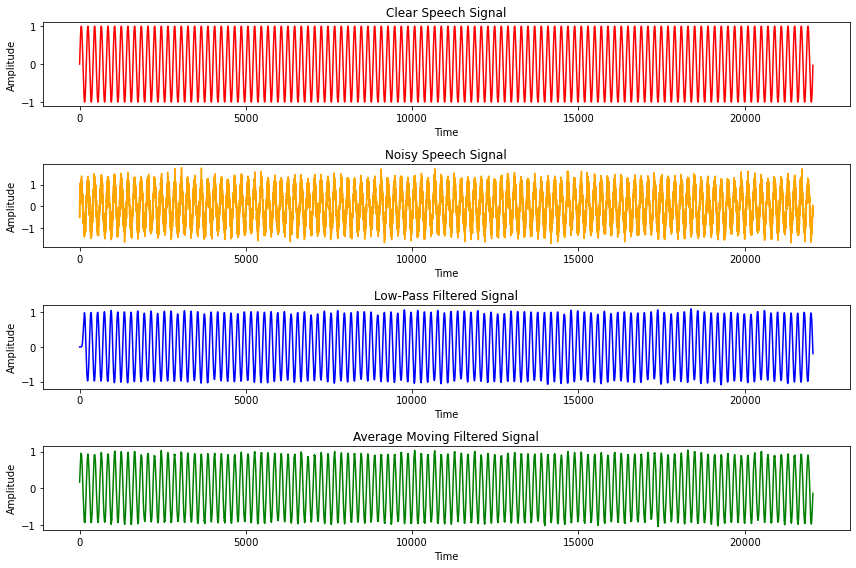

In [2]:
import numpy as np
from scipy.io import wavfile
import scipy.signal as sig  
import matplotlib.pyplot as plt  

# Function to generate a simple speech-like signal
def generate_speech_signal(duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    frequency = 220  # Adjust this for different speech patterns
    speech_signal_1 = np.sin(2 * np.pi * frequency * t)  
    return speech_signal_1 

# Function to add white noise to a signal
def add_white_noise(signal, snr_dB):
    signal_power = np.mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr_dB / 10))
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    noisy_signal_1 = signal + noise  
    return noisy_signal_1  

# Function to apply a low-pass filter
def apply_low_pass_filter(signal, cutoff_frequency, sampling_rate):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = sig.butter(10, normal_cutoff, btype='low', analog=False) 
    filtered_signal = sig.lfilter(b, a, signal)  
    return filtered_signal

# Function to apply an average moving filter
def apply_average_moving_filter(signal, window_size):
    # Create the moving average kernel
    kernel = np.ones(window_size) / window_size
    # Apply the convolution operation to smooth the signal
    smoothed_signal = np.convolve(signal, kernel, mode='same')
    return smoothed_signal

# Define the duration and sampling rate
duration = 0.5  # seconds
sampling_rate = 44100  # samples per second

# Generate a speech-like signal
speech_signal_1 = generate_speech_signal(duration, sampling_rate)  

# Add white noise to the speech signal (adjust SNR as needed)
snr_dB = 10  # Signal-to-noise ratio in dB
noisy_signal_1 = add_white_noise(speech_signal_1, snr_dB)  

# Define cutoff frequency for the low-pass filter
cutoff_frequency = 500  # Adjust this as needed

# Apply the low-pass filter to the noisy speech signal
filtered_signal_low_pass = apply_low_pass_filter(noisy_signal_1, cutoff_frequency, sampling_rate)

# Define the window size for the average moving filter
window_size = 40  # Adjust this as needed

# Apply the average moving filter to the noisy speech signal
filtered_signal_average_moving = apply_average_moving_filter(noisy_signal_1, window_size)

# Plot the original noisy signal and the filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(speech_signal_1, color='red')
plt.title('Clear Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(noisy_signal_1, color='orange')
plt.title('Noisy Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(filtered_signal_low_pass, color='blue')
plt.title('Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(filtered_signal_average_moving, color='green')
plt.title('Average Moving Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Optionally, you can save the filtered signals as WAV files
wavfile.write('filtered_low_pass.wav', sampling_rate, filtered_signal_low_pass.astype(np.int16))
wavfile.write('filtered_average_moving.wav', sampling_rate, filtered_signal_average_moving.astype(np.int16))


## <font color="#CC0099"> Analysis: 
    
### <font color="#660066"> Let's see why the amplitude of signal is reduced after application of the moving average filter. The primary purpose of an average moving filter is to smooth a signal by averaging the values within a moving window. When this filter is applied to a signal, it replaces each data point with the average value of the points within the window. This averaging process inherently reduces the amplitude of high-frequency components in the signal. As a result, sharp peaks and rapid variations in the signal are "smoothed out," which can lead to a reduction in amplitude. In addition, the size of the moving window in the average moving filter is a critical factor. A larger window size results in more extensive smoothing because it considers a greater number of neighboring data points for averaging. This tends to reduce the amplitude of the signal more significantly, as it incorporates more neighboring values in the averaging process.

## <font color="#CC0099"> Evaluation of Performance of the Basic Filters:

### <font color="#CC6699">1) Signal to Noise Ratio (SNR):

### <font color="#660066">SNR stands for Signal-to-Noise Ratio. It is a measure used in various fields, including signal processing, communications, and electronics, to quantify the quality of a signal by comparing the strength of the desired signal (the "signal" component) to the presence of unwanted noise (the "noise" component).

### <font color="#660066">Mathematically, SNR is often expressed in decibels (dB) and calculated using the following formula:

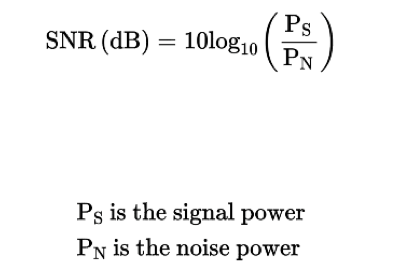

  

### <font color="#660066">In the context of audio and speech processing, a higher SNR indicates that the signal is more prominent compared to the noise, which generally corresponds to better audio quality. Conversely, a lower SNR suggests that noise is more dominant and may degrade the quality of the audio.




In [111]:
# Calculate SNR for the Noisy Signal
def calculate_snr(signal, original_signal):
    # Calculate the power of the original signal
    original_power = np.mean(original_signal ** 2)
    
    # Calculate the power of the noise (difference between noisy and original signals)
    noise = original_signal - signal
    noise_power = np.mean(noise ** 2)
    
    # Calculate SNR in dB
    snr_db = 10 * np.log10(original_power / noise_power)
    
    return snr_db

# Calculate SNR for the Noisy Signal
snr_noisy = calculate_snr(noisy_signal_1, speech_signal_1)

# Calculate SNR for the Low-Pass Filtered Signal
snr_low_pass = calculate_snr(filtered_signal_low_pass, speech_signal_1)

# Calculate SNR for the Average Moving Filtered Signal
snr_average_moving = calculate_snr(filtered_signal_average_moving, speech_signal_1)

# Print SNR values
print("SNR for Noisy Signal:", snr_noisy, "dB")
print("SNR for Low-Pass Filtered Signal:", snr_low_pass, "dB")
print("SNR for  Moving Average Filtered Signal:", snr_average_moving, "dB")


SNR for Noisy Signal: 10.015401558041077 dB
SNR for Low-Pass Filtered Signal: 15.617284394865894 dB
SNR for  Moving Average Filtered Signal: 12.106957341985913 dB


## <font color="#CC0099"> Analysis: 

### <font color="#660066"> As observed, the Signal-to-Noise Ratio (SNR) for the initial noisy signal was set at 10dB, as specified in the code. The application of the low-pass filter resulted in an SNR increase to approximately 15.5dB, whereas the Moving Average filter raised the SNR from 10dB to 12dB. These results suggest that, when dealing with this particular type of noise, the low-pass filter outperforms the Moving Average filter as a fundamental noise reduction technique.

### <font color="#CC6699">2) Subjective Listening Test:

In [110]:
from IPython.display import Audio, display

# Function to play audio
def play_audio(audio_signal, sampling_rate):
    display(Audio(audio_signal, rate=sampling_rate))

# Play Clean Speech
print("Listening to Clean Speech...")
play_audio(speech_signal_1, sampling_rate)

# Play  Noisy speech
print("Listening Noisy Speech...")
play_audio(noisy_signal_1, sampling_rate)

# Play low-pass filtered speech
print("Listening to Low-Pass Filtered Speech...")
play_audio(filtered_signal_low_pass, sampling_rate)

# Play moving average filtered speech
print("Listening to Moving Average Filtered Speech...")
play_audio(filtered_signal_average_moving, sampling_rate)


Listening to Clean Speech...


Listening Noisy Speech...


Listening to Low-Pass Filtered Speech...


Listening to Moving Average Filtered Speech...


## <font color="#CC0099"> Wiener Filter

    
### <font color="#660066">The Wiener filter is a linear time-invariant filter used for various signal processing applications, including noise reduction and image restoration. Its primary purpose is to estimate a desired, clean signal from a noisy observation by exploiting the statistical properties of the signal and noise.

### <font color="#660066">Here's a brief overview of what the Wiener filter does:

### <font color="#CC6699"> Noise Estimation:
### <font color="#660066">The Wiener filter first estimates the statistical properties of the noise present in the observed signal. This estimation can be based on either a priori knowledge of the noise statistics or by analyzing a noise-only segment of the signal.

### <font color="#CC6699"> Signal Estimation:
### <font color="#660066">It then estimates the statistical properties of the desired clean signal. This typically involves modeling the signal and noise as stochastic processes in the frequency domain. These models describe how the signal and noise power spectra relate to each other.

### <font color="#CC6699">Frequency Domain Filtering:
### <font color="#660066"> Using the estimated signal and noise statistics, the Wiener filter calculates a frequency domain filter (transfer function) that optimally attenuates the noise while preserving the signal. This filter is designed to minimize the mean squared error between the clean signal and the estimated signal.

### <font color="#CC6699">Filtering:
### <font color="#660066">The filter is applied to the noisy observation in the frequency domain using convolution or multiplication. This results in a filtered signal where noise components are reduced, and the desired signal components are enhanced.

### <font color="#660066">The Wiener filter is particularly effective when both the signal and noise are stationary (their statistical properties do not change with time) and when the power spectral densities of the signal and noise are known or can be estimated accurately.


### <font color="#660066"> Let's analyze the stationary properties of the signals in my code:

### <font color="#CC6699">Clean Speech Signal (speech_signal_3):

### <font color="#660066">This signal is generated as a simple sinusoidal waveform with a fixed frequency (440 Hz). It's a deterministic and periodic signal.
### <font color="#660066">Deterministic periodic signals like this one are generally considered stationary because their statistical properties, such as mean and variance, remain constant over time.
    
    
### <font color="#CC6699">Noisy Signal (noisy_signal_3) (Original Signal + White Noise):

### <font color="#660066">The noisy signal is obtained by adding white noise to the clean speech signal.
### <font color="#660066">The clean speech signal is stationary (as mentioned above), and the added white noise is stationary with constant variance.
### <font color="#660066">When you combine stationary signals, the resulting signal is also generally considered stationary.
### <font color="#660066">So, in this case, both the clean speech signal and the noisy signal can be considered stationary because they consist of deterministic or stationary components.

## <font color="#CC0099"> Implementation of Wiener Filtering on generated noisy signal:

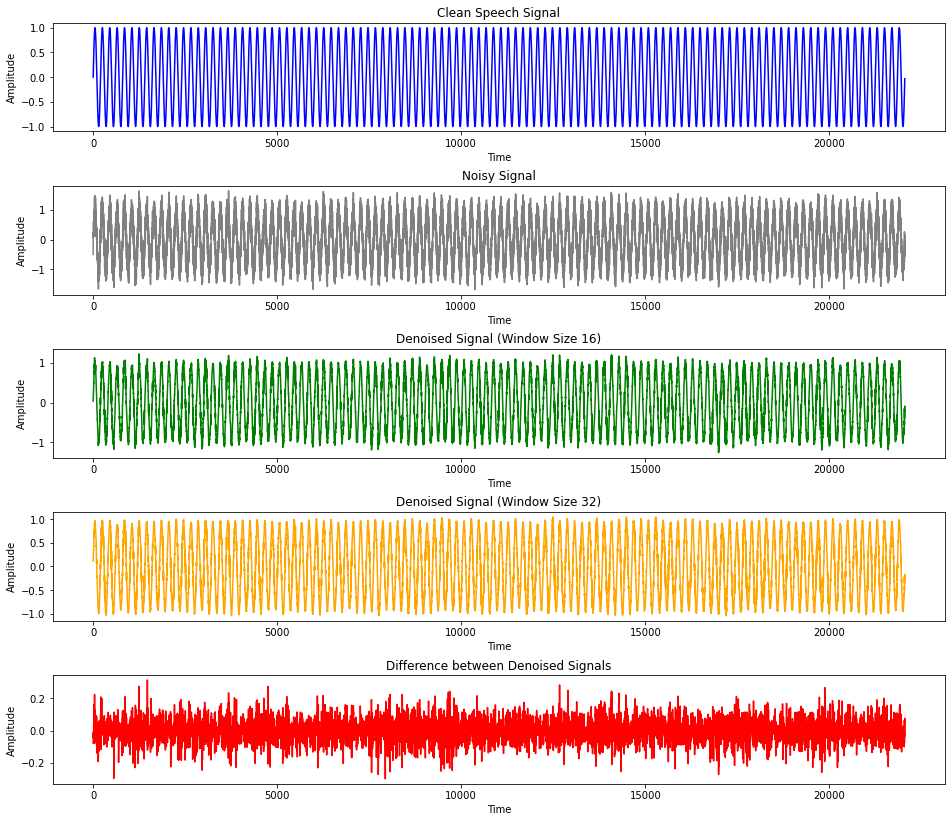

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import wiener

# Function to generate a simple speech-like signal
def generate_speech_signal(duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    frequency = 220  # Adjust this for different speech patterns
    speech_signal_3 = np.sin(2 * np.pi * frequency * t)
    return speech_signal_3

# Function to add white noise to a signal
def add_white_noise(signal, snr_dB):
    signal_power = np.mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr_dB / 10))
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    noisy_signal_3 = signal + noise
    return noisy_signal_3



# Define the duration and sampling rate
duration = 0.5  # seconds
sampling_rate = 44100  # samples per second

# Generate a speech-like signal
speech_signal_3 = generate_speech_signal(duration, sampling_rate)

# Add white noise to the speech signal (adjust SNR as needed)
snr_dB = 10  # Signal-to-noise ratio in dB
noisy_signal_3 = add_white_noise(speech_signal_3, snr_dB)



# Set the Wiener filter window size for the first denoised signal
window_size_1 = 16
first_denoised_signal = wiener(noisy_signal_3, mysize=window_size_1)

# Set a different Wiener filter window size for the second denoised signal
window_size_2 = 32
# Perform Wiener filter for denoising with the second window size
second_denoised_signal = wiener(noisy_signal_3, mysize=window_size_2)

# Calculate the  difference between the two denoised signals
difference_signal = (first_denoised_signal - second_denoised_signal)



# Save the noisy and denoised signals as WAV files
wavfile.write('noisy_audio.wav', sampling_rate, (noisy_signal_3 * 32767).astype(np.int16))
wavfile.write('denoised_audio_1.wav', sampling_rate, (first_denoised_signal * 32767).astype(np.int16))
wavfile.write('denoised_audio_2.wav', sampling_rate, (second_denoised_signal * 32767).astype(np.int16))





# Plot the original, noisy, and denoised signals for visualization
plt.figure(figsize=(16, 20))  

# Plot for original clear signal
plt.subplot(7, 1, 1)
plt.plot(speech_signal_3, color='blue')
plt.title('Clean Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot for noisy signal
plt.subplot(7, 1, 2)
plt.plot(noisy_signal_3, color='gray')
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')




# Plot for denoised signal with window_size_1
plt.subplot(7, 1, 3)
plt.plot(first_denoised_signal, color='green')
plt.title(f'Denoised Signal (Window Size {window_size_1})')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot for denoised signal with window_size_2
plt.subplot(7, 1, 4)
plt.plot(second_denoised_signal, color='orange')
plt.title(f'Denoised Signal (Window Size {window_size_2})')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot for the difference between denoised signals
plt.subplot(7, 1, 5)
plt.plot(difference_signal, color='red')
plt.title(f'Difference between Denoised Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')


# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)


plt.show()

## <font color="#CC0099"> Analysis:

### <font color="#660066"> The difference in the amplitude range between the two denoised signals for different window sizes (64 and 32) can be attributed to how the Wiener filter processes the input signal in each case. This difference in amplitude range may have various implications depending on your specific application and requirements:

### <font color="#CC6699">Amplitude Scaling:

### <font color="#660066">The Wiener filter, like many other signal processing techniques, can scale the amplitude of the output signal. The choice of window size can affect how much the amplitude is scaled.
### <font color="#660066">Smaller window sizes (e.g., 32) might result in less amplitude scaling because they focus on shorter segments of the signal. This could lead to an output signal with a wider amplitude range.
### <font color="#660066">Larger window sizes (e.g., 64) may result in more amplitude scaling because they consider longer segments of the signal. This could cause the output signal to have a narrower amplitude range.
    
### <font color="#CC6699">Signal Preservation vs. Noise Reduction:

### <font color="#660066">Smaller window sizes tend to preserve the signal more faithfully, including its amplitude. As a result, the amplitude range in the denoised signal may closely resemble that of the original clean signal.
### <font color="#660066">Larger window sizes prioritize noise reduction but may also smooth out variations in the signal, leading to a narrower amplitude range.

## <font color="#CC0099"> Evaluation of Performance of the Wiener Filter:

### <font color="#CC6699">1) Signal to Noise Ratio (SNR):

In [113]:
def calculate_snr(speech_signal_3, noisy_signal_3):
    # Calculate the power of the clean signal
    speech_signal_power = np.mean(speech_signal_3 ** 2)
    
    # Calculate the power of the noise (difference between clean and noisy signals)
    noise = speech_signal_3 - noisy_signal_3
    noise_power = np.mean(noise ** 2)
    
    # Calculate SNR in dB
    snr_db = 10 * np.log10(speech_signal_power / noise_power)
    
    return snr_db

# Calculate SNR for clean and noisy signals
snr_clean = calculate_snr(speech_signal_3, noisy_signal_3)
snr_denoised_1 = calculate_snr(speech_signal_3, first_denoised_signal)
snr_denoised_2 = calculate_snr(speech_signal_3, second_denoised_signal)
# Print SNR values
print(f"SNR of Clean Signal: {snr_clean:.2f} dB")
print(f"SNR of First Denoised Signal With {window_size_1}: {snr_denoised_1:.2f} dB")
print(f"SNR of Second Denoised SignalWith {window_size_2}: {snr_denoised_2:.2f} dB")

SNR of Clean Signal: 10.03 dB
SNR of First Denoised Signal With 16: 18.86 dB
SNR of Second Denoised SignalWith 32: 14.94 dB


## <font color="#CC0099"> Analysis: 
    
### <font color="#660066"> As evident from the results, the Wiener filter, with a window size of 32, effectively improved the Signal-to-Noise Ratio (SNR) by an additional 4dB compared to the initial noisy signal. Interestingly, when we reduced the window size by half, from 32 to 16, the Wiener filter's performance further improved, elevating the SNR to over 18dB. This performance surpasses that of all the other filters we experimented with, establishing itself as the top-performing filter.

### <font color="#660066"> Notably, the Wiener filter with a window size of 32 demonstrated a performance level quite similar to that of the basic low-pass filter. Conversely, adjusting the window size had a notable impact on the Wiener filter's performance, enhancing its effectiveness as a more intricate filtering technique. This underscores the significance of fine-tuning parameters to achieve optimal results.
    
### <font color="#660066"> Decreasing the window size in the Wiener filter can improve its performance for several reasons:
    
### <font color="#CC6699">Enhanced Local Adaptation:
### <font color="#660066"> Smaller window sizes allow the Wiener filter to adapt more quickly to rapid changes in the signal. This can be especially useful in scenarios where noise characteristics vary over shorter time intervals. With a smaller window, the filter can better capture and adapt to these variations, resulting in improved noise reduction.

### <font color="#CC6699">Reduced Smoothing:
### <font color="#660066"> A smaller window size results in less smoothing or averaging of neighboring samples within the window. This reduced smoothing can preserve more of the signal's original detail while still effectively reducing noise. In contrast, larger windows may oversmooth the signal, leading to loss of fine details.

### <font color="#CC6699">Improved Time Resolution:
### <font color="#660066"> Smaller windows offer better time resolution, meaning they can distinguish between changes in the signal and changes in noise over shorter time periods. This can be advantageous when dealing with transient noise or when rapid signal variations need to be preserved.
    
    
### <font color="#660066">However, it's essential to strike a balance when selecting the window size. Too small of a window may make the filter sensitive to very high-frequency noise, which could degrade the performance. The optimal window size often depends on the specific characteristics of the signal and noise in a given application. Therefore, as I mentioned before, experimentation and parameter tuning are crucial to determine the best window size for a particular filtering task. 

### <font color="#CC6699">2) Subjective Listening Test:

In [30]:
from IPython.display import Audio, display

# Function to play audio
def play_audio(audio_signal, sampling_rate):
    display(Audio(audio_signal, rate=sampling_rate))

# Play Clean Speech
print("Listening to Clean Speech...")
play_audio(speech_signal_3, sampling_rate)

# Play Noisy speech
print("Listening to noisy speech ...")
play_audio(noisy_signal_3, sampling_rate)

# Play denoised speech with first window size
window_size_1 = 128
print(f"Listening to denoised speech with window size of {window_size_1} ...")
play_audio(first_denoised_signal, sampling_rate)

# Play denoised speech with second window size
window_size_2 = 32
print(f"Listening to denoised speech with window size of {window_size_2} ...")
play_audio(second_denoised_signal, sampling_rate)


Listening to Clean Speech...


Listening to noisy speech ...


Listening to denoised speech with window size of 128 ...


Listening to denoised speech with window size of 32 ...


## <font color="#CC0099"> Analysis:

### <font color="#660066"> The choice between Signal-to-Noise Ratio (SNR) and Root Mean Square Error (RMSE) as a metric to assess the result of the Wiener filter depends on your specific application and what aspect of the denoising process you want to evaluate. Below I explain my objectives and why SNR was the best choice for my case:

### <font color="#CC6699">Advantages:
### <font color="#660066">SNR provides a direct measure of the quality of the denoised signal by comparing the power of the signal to the power of the residual noise.It is a common metric used in audio and speech processing to quantify how well the desired signal is preserved relative to the noise.
### <font color="#CC6699">Use Cases:
### <font color="#660066">SNR is particularly useful when the primary concern is preserving the signal quality and reducing noise as much as possible.It's a good choice when you want to evaluate the denoising algorithm's performance in terms of noise reduction.
### <font color="#660066"> As it is clear, these advantages and usages are match with the method that I adopt. 